
Task: map 
Table of Contents

1. Import libraries 
2. Perform EDA
3. Display the map of San Francisco then add incidents reported to San Francisco Police Department onto the map

In [1]:
# Import libraries 
import numpy as np 
import pandas as pd 
import folium
from folium import plugins
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

Datasets:

1.  San Francisco Police Department Incidents for the year 2016 - [Police Department Incidents](https://data.sfgov.org/Public-Safety/Police-Department-Incidents-Previous-Year-2016-/ritf-b9ki?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) from San Francisco public data portal. Incidents derived from San Francisco Police Department (SFPD) Crime Incident Reporting system. Updated daily, showing data for the entire year of 2016. Address and location has been anonymized by moving to mid-block or to an intersection.

In [13]:
df = pd.read_csv('Police_Department_Incidents_2016.csv')
df.head()

,Unnamed: 0,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",16106100004134
150496,150496,176000742,NON-CRIMINAL,LOST PROPERTY,Friday,12/30/2016 12:00:00 AM,08:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,-122.401857,37.796626,"(37.7966261239618, -122.401857374739)",17600074271000
150497,150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",17600075806372
150498,150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)",17600076406374


So each row consists of 13 features:

> 1.  **IncidntNum**: Incident Number
> 2.  **Category**: Category of crime or incident
> 3.  **Descript**: Description of the crime or incident
> 4.  **DayOfWeek**: The day of week on which the incident occurred
> 5.  **Date**: The Date on which the incident occurred
> 6.  **Time**: The time of day on which the incident occurred
> 7.  **PdDistrict**: The police department district
> 8.  **Resolution**: The resolution of the crime in terms whether the perpetrator was arrested or not
> 9.  **Address**: The closest address to where the incident took place
> 10. **X**: The longitude value of the crime location
> 11. **Y**: The latitude value of the crime location
> 12. **Location**: A tuple of the latitude and the longitude values
> 13. **PdId**: The police department ID

SOUTHERN      28445
NORTHERN      20100
MISSION       19503
CENTRAL       17666
BAYVIEW       14303
INGLESIDE     11594
TARAVAL       11325
TENDERLOIN     9942
RICHMOND       8922
PARK           8699
Name: PdDistrict, dtype: int64


<AxesSubplot:xlabel='PdDistrict', ylabel='count'>

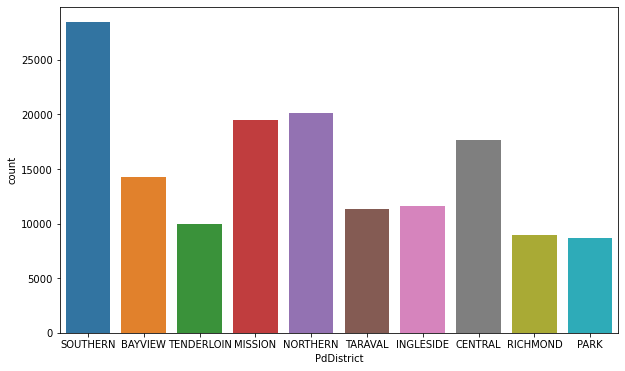

In [4]:
# Pd District count with most incident
print(df['PdDistrict'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(df['PdDistrict'])

In [5]:
# top 20 days with the most incidents  
day = df['Date'].value_counts().to_frame()
day['Date'].nlargest(n=20).to_frame()

,Date
01/01/2016 12:00:00 AM,558
10/08/2016 12:00:00 AM,532
04/01/2016 12:00:00 AM,525
01/29/2016 12:00:00 AM,514
12/14/2016 12:00:00 AM,507
06/25/2016 12:00:00 AM,507
07/01/2016 12:00:00 AM,505
02/01/2016 12:00:00 AM,492
02/04/2016 12:00:00 AM,492
11/18/2016 12:00:00 AM,489


           DayOfWeek
Friday         23371
Saturday       22172
Thursday       21395
Wednesday      21332
Tuesday        21242
Monday         20783
Sunday         20205


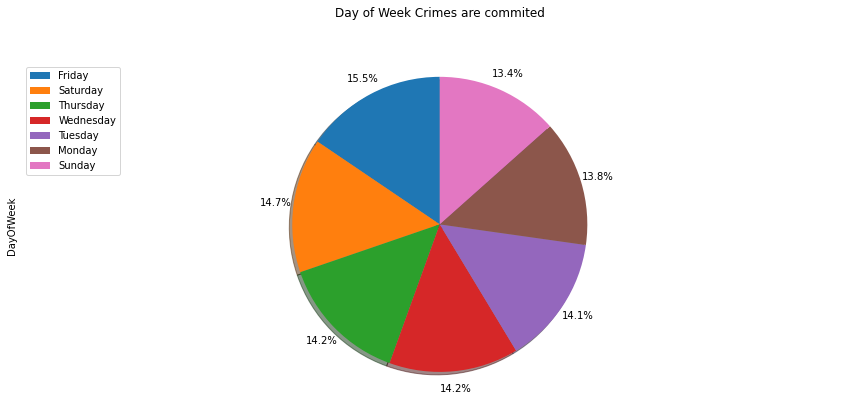

In [6]:
daycrime = df['DayOfWeek'].value_counts().to_frame()
print(daycrime)
daycrime['DayOfWeek'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            )

# scale the title up by 12% to match pctdistance
plt.title('Day of Week Crimes are commited', y=1.12) 
plt.axis('equal') 
plt.legend(labels=daycrime.index, loc='upper left') 
plt.show()

In [7]:
# get the first 1000 crimes in the df_incidents dataframe
limit = 1000
df_incidents = df.iloc[0:limit, :]

In [8]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

Display the latitude, longitude and Descript crime types. furthermore add a pop-up text to each marker.

In [9]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 1000 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Descript)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

Now lets group the markers into different clusters. Each cluster is represented by the number of crimes in each neighborhood. These clusters can be thought of as pockets of San Francisco which you can then analyze separately.

In [10]:

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Descript):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map